In [131]:
import sys
sys.path.append("/home/phylab/hepwork/ma5-histo")
sys.path.append("/home/phylab/hepwork/ma5_expert")

import src.SafReader as sr
from CutFlowReader import Collection 

import pandas as pd
import numpy as np
import matplotlib, os
import matplotlib.pyplot as plt
# Matplotlib configuration
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.style.use('classic')
plt.rcParams['xtick.direction']     = 'in'
plt.rcParams['ytick.direction']     = 'in'
plt.rcParams['xtick.top']           = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.right']         = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import matplotlib.cm as cm

from matplotlib import pyplot
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family' : "sans-serif"})
params= {'text.latex.preamble' : [r'\usepackage{amssymb}']}
pyplot.rcParams.update(params)

In [132]:
def df(fileLoc):
    data = sr.read(fileLoc=fileLoc)
    floatCols=['binMin', 'binMax', 'value']
    data[floatCols]  = data[floatCols].apply(pd.to_numeric, errors='coerce')
    data["bin"]      = (data.binMin+data.binMax)/2
    data             = data[data.binMax != np.inf]
    data             = data[data.binMin != -1*np.inf]
    data["binlabel"] = (data.binMin+data.binMax)/2
    return data

In [133]:
ma5 = '/home/phylab/hepwork/madanalysis5'

##################### SM LO ######################
SM_LO  = Collection(collection_path= ma5+'/ChargeAsymmetry/Output/SAF/SMlepneut_LO/MadAnalysis5job_0/Cutflows',
                    saf_file       = ma5+'/ChargeAsymmetry/Output/SAF/SMlepneut_LO/SMlepneut_LO.saf',
                    lumi           = 300.)
SM_LO_SR_Lepton_PT_25_sumw     = (SM_LO['SR_Lepton_PT_25'][0].sumw)
SM_LO_SR_Lepton_PT_30_sumw     = (SM_LO['SR_Lepton_PT_30'][0].sumw)
SM_LO_SR_Electron_PT_25_sumw   = (SM_LO['SR_Electron_PT_25'][0].sumw)
SM_LO_SR_Electron_PT_30_sumw   = (SM_LO['SR_Electron_PT_30'][0].sumw)
SM_LO_SR_Muon_PT_25_sumw       = (SM_LO['SR_Muon_PT_25'][0].sumw)
SM_LO_SR_Muon_PT_30_sumw       = (SM_LO['SR_Muon_PT_30'][0].sumw)
SM_LO_histos = df(ma5+'/ChargeAsymmetry/Output/SAF/SMlepneut_LO/MadAnalysis5job_0/Histograms/histos.saf')

""""
############################## SM NLO #####################################
SM_NLO = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SMll_NLO/MadAnalysis5job_1/Cutflows', xsection = 0.00009826266, lumi= 300.)
SM_NLO_RapNo_sumw   = (SM_NLO['Rap_No'][0].sumw)
SM_NLO_Rap00_sumw   = (SM_NLO['Rap_00'][0].sumw)
SM_NLO_Rap01_sumw   = (SM_NLO['Rap_01'][0].sumw)
SM_NLO_Rap02_sumw   = (SM_NLO['Rap_02'][0].sumw)
SM_NLO_Rap04_sumw   = (SM_NLO['Rap_04'][0].sumw)
SM_NLO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SMll_NLO/MadAnalysis5job_1/Histograms/histos.saf')
"""

############################## Sequential SM ##############################
SSM_LO = Collection(collection_path= ma5+'/ChargeAsymmetry/Output/SAF/SSMlepneutFull_LO/MadAnalysis5job_0/Cutflows',
                    saf_file       = ma5+'/ChargeAsymmetry/Output/SAF/SSMlepneutFull_LO/SSMlepneutFull_LO.saf',
                    lumi           = 300.)
SSM_LO_SR_Lepton_PT_25_sumw     = (SSM_LO['SR_Lepton_PT_25'][0].sumw)
SSM_LO_SR_Lepton_PT_30_sumw     = (SSM_LO['SR_Lepton_PT_30'][0].sumw)
SSM_LO_SR_Electron_PT_25_sumw   = (SSM_LO['SR_Electron_PT_25'][0].sumw)
SSM_LO_SR_Electron_PT_30_sumw   = (SSM_LO['SR_Electron_PT_30'][0].sumw)
SSM_LO_SR_Muon_PT_25_sumw       = (SSM_LO['SR_Muon_PT_25'][0].sumw)
SSM_LO_SR_Muon_PT_30_sumw       = (SSM_LO['SR_Muon_PT_30'][0].sumw)
SSM_LO_histos = df(ma5+'/ChargeAsymmetry/Output/SAF/SSMlepneutFull_LO/MadAnalysis5job_0/Histograms/histos.saf')

"""
############################## Sequential SM NLO (Only Z')##############################
xsec_run01 = 3.231871e-03; nevent_run01 = 200000  
xsec_run02 = 3.234041e-03; nevent_run02 = 100000
xsec_run03 = 3.237111e-03; nevent_run03 = 500000
xsec_run04 = 3.239792e-03; nevent_run04 = 600000
xsec_run06 = 2.595824e-04; nevent_run06 = 500000
xsec_tot = (xsec_run01*nevent_run01 + xsec_run02*nevent_run02 + xsec_run03*nevent_run03 + xsec_run04*nevent_run04 + xsec_run06*nevent_run06)/(nevent_run01+nevent_run02+nevent_run03+nevent_run04+nevent_run06)
SSM_NLO = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SSMll_NLO/MadAnalysis5job_0/Cutflows',xsection=xsec_tot, lumi= 300.)
SSM_NLO_RapNo_sumw   = (SSM_NLO['Rap_No'][0].sumw)
SSM_NLO_Rap00_sumw   = (SSM_NLO['Rap_00'][0].sumw)
SSM_NLO_Rap01_sumw   = (SSM_NLO['Rap_01'][0].sumw)
SSM_NLO_Rap02_sumw   = (SSM_NLO['Rap_02'][0].sumw)
SSM_NLO_Rap04_sumw   = (SSM_NLO['Rap_04'][0].sumw)
SSM_NLO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SSMll_NLO/MadAnalysis5job_0/Histograms/histos.saf')

############################## Interference between SM and Sequential SM @LO #############
xsec_run01 = -1.237357e-04; nevent_run01 = 200000  
xsec_run02 = -9.068639e-05; nevent_run02 = 196726
xsec_run03 = -0.0001238;    nevent_run03 = 10000000
xsec_run04 = -0.0001239792; nevent_run04 = 10000000
xsec_tot   = (xsec_run01*nevent_run01 + xsec_run02*nevent_run02 + xsec_run03*nevent_run03 + xsec_run04*nevent_run04)/(nevent_run01+nevent_run02+nevent_run03+nevent_run04)
Inter_SMvsSSM = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SSMtoll_LO_Interference/MadAnalysis5job_5/Cutflows', xsection=xsec_tot, lumi= 300.)
Inter_SMvsSSM_RapNo_sumw   = (Inter_SMvsSSM['Rap_No'][0].sumw)
Inter_SMvsSSM_Rap00_sumw   = (Inter_SMvsSSM['Rap_00'][0].sumw)
Inter_SMvsSSM_Rap01_sumw   = (Inter_SMvsSSM['Rap_01'][0].sumw)
Inter_SMvsSSM_Rap02_sumw   = (Inter_SMvsSSM['Rap_02'][0].sumw)
Inter_SMvsSSM_Rap04_sumw   = (Inter_SMvsSSM['Rap_04'][0].sumw)
Inter_SMvsSSM_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SSMtoll_LO_Interference/MadAnalysis5job_5/Histograms/histos.saf')
"""

"\n############################## Sequential SM NLO (Only Z')##############################\nxsec_run01 = 3.231871e-03; nevent_run01 = 200000  \nxsec_run02 = 3.234041e-03; nevent_run02 = 100000\nxsec_run03 = 3.237111e-03; nevent_run03 = 500000\nxsec_run04 = 3.239792e-03; nevent_run04 = 600000\nxsec_run06 = 2.595824e-04; nevent_run06 = 500000\nxsec_tot = (xsec_run01*nevent_run01 + xsec_run02*nevent_run02 + xsec_run03*nevent_run03 + xsec_run04*nevent_run04 + xsec_run06*nevent_run06)/(nevent_run01+nevent_run02+nevent_run03+nevent_run04+nevent_run06)\nSSM_NLO = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SSMll_NLO/MadAnalysis5job_0/Cutflows',xsection=xsec_tot, lumi= 300.)\nSSM_NLO_RapNo_sumw   = (SSM_NLO['Rap_No'][0].sumw)\nSSM_NLO_Rap00_sumw   = (SSM_NLO['Rap_00'][0].sumw)\nSSM_NLO_Rap01_sumw   = (SSM_NLO['Rap_01'][0].sumw)\nSSM_NLO_Rap02_sumw   = (SSM_NLO['Rap_02'][0].sumw)\nSSM_NLO_Rap04_sumw   = (SSM_NLO['Rap_04'][0].sumw)\nSSM_NLO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SS

In [63]:
#from CutFlowTable import CutFlowTable
#out =open('Comparison_LOvsNLO.tex','w')
#CutFlowTable(sm,StockSM, sample_names=['SM @LO','SM @LO using NLO pac']).write_comparison_table(out, mcunc=False)
#!make > mk.log && rm Makefile

In [134]:
lumi=300.

bins = np.array(SSM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_plus)'].binMin).tolist()+[max(SSM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_minus)'].binMax)]

In [135]:
########### Standard Model @LO ########################

########### SM @LO ACC [ETA(l- > 0)] ##################

SM_LO_ACCp_Lep_PT25 = plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Lepton_plus)'].value,dtype=float)*SM_LO.xsec/SM_LO_SR_Lepton_PT_25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_ACCp_Elec_PT25 = plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_plus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_plus)'].value,dtype=float)*SM_LO.xsec/SM_LO_SR_Electron_PT_25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_ACCp_Muon_PT25 = plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Muon_plus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Muon_plus)'].value,dtype=float)*SM_LO.xsec/SM_LO_SR_Muon_PT_25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_ACCp_Lep_PT30 = plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].value,dtype=float)*SM_LO.xsec/SM_LO_SR_Lepton_PT_30_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_ACCp_Elec_PT30 = plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Electron_plus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Electron_plus)'].value,dtype=float)*SM_LO.xsec/SM_LO_SR_Electron_PT_30_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_ACCp_Muon_PT30 = plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Muon_plus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Muon_plus)'].value,dtype=float)*SM_LO.xsec/SM_LO_SR_Muon_PT_30_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

########### SM @LO ACC [ETA(l- < 0)] ##################

SM_LO_ACCm_Lep_PT25 = plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Lepton_minus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Lepton_minus)'].value,dtype=float)*SM_LO.xsec/SM_LO_SR_Lepton_PT_25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_ACCm_Elec_PT25 = plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_minus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_minus)'].value,dtype=float)*SM_LO.xsec/SM_LO_SR_Electron_PT_25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_ACCm_Muon_PT25 = plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Muon_minus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Muon_minus)'].value,dtype=float)*SM_LO.xsec/SM_LO_SR_Muon_PT_25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_ACCm_Lep_PT30 = plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_minus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_minus)'].value,dtype=float)*SM_LO.xsec/SM_LO_SR_Lepton_PT_30_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_ACCm_Elec_PT30 = plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Electron_minus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Electron_minus)'].value,dtype=float)*SM_LO.xsec/SM_LO_SR_Electron_PT_30_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_LO_ACCm_Muon_PT30 = plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Muon_minus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Muon_minus)'].value,dtype=float)*SM_LO.xsec/SM_LO_SR_Muon_PT_30_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")


plt.close()

############ Calculating AFB ###########################

SM_LO_ACCnum_Lep_PT25 = SM_LO_ACCp_Lep_PT25[0] - SM_LO_ACCm_Lep_PT25[0]
SM_LO_ACCden_Lep_PT25 = SM_LO_ACCp_Lep_PT25[0] + SM_LO_ACCm_Lep_PT25[0]

SM_LO_ACCnum_Elec_PT25 = SM_LO_ACCp_Elec_PT25[0] - SM_LO_ACCm_Elec_PT25[0]
SM_LO_ACCden_Elec_PT25 = SM_LO_ACCp_Elec_PT25[0] + SM_LO_ACCm_Elec_PT25[0]

SM_LO_ACCnum_Muon_PT25 = SM_LO_ACCp_Muon_PT25[0] - SM_LO_ACCm_Muon_PT25[0]
SM_LO_ACCden_Muon_PT25 = SM_LO_ACCp_Muon_PT25[0] + SM_LO_ACCm_Muon_PT25[0]


SM_LO_ACCnum_Lep_PT30 = SM_LO_ACCp_Lep_PT30[0] - SM_LO_ACCm_Lep_PT30[0]
SM_LO_ACCden_Lep_PT30 = SM_LO_ACCp_Lep_PT30[0] + SM_LO_ACCm_Lep_PT30[0]

SM_LO_ACCnum_Elec_PT30 = SM_LO_ACCp_Elec_PT30[0] - SM_LO_ACCm_Elec_PT30[0]
SM_LO_ACCden_Elec_PT30 = SM_LO_ACCp_Elec_PT30[0] + SM_LO_ACCm_Elec_PT30[0]

SM_LO_ACCnum_Muon_PT30 = SM_LO_ACCp_Muon_PT30[0] - SM_LO_ACCm_Muon_PT30[0]
SM_LO_ACCden_Muon_PT30 = SM_LO_ACCp_Muon_PT30[0] + SM_LO_ACCm_Muon_PT30[0]

In [136]:
########### Standard Model @NLO ########################

########### SM @NLO AFB [ETA(l- > 0)] ##################

SM_NLO_AFBp_RapNo = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_No'].value,dtype=float)*SM_NLO.xsec/SM_NLO_RapNo_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBp_Rap00 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_00'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap00_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBp_Rap01 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_01'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap01_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBp_Rap02 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_02'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap02_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

########### SM @NLO AFB [ETA(l- < 0)] ##################

SM_NLO_AFBm_RapNo = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_No'].value,dtype=float)*SM_NLO.xsec/SM_NLO_RapNo_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBm_Rap00 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_00'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap00_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBm_Rap01 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_01'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap01_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_AFBm_Rap02 = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_02'].value,dtype=float)*SM_NLO.xsec/SM_NLO_Rap02_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

plt.close()

############ Calculating AFB ###########################

SM_NLO_AFBnum_RapNo = SM_NLO_AFBp_RapNo[0] - SM_NLO_AFBm_RapNo[0]
SM_NLO_AFBden_RapNo = SM_NLO_AFBp_RapNo[0] + SM_NLO_AFBm_RapNo[0]

SM_NLO_AFBnum_Rap00 = SM_NLO_AFBp_Rap00[0] - SM_NLO_AFBm_Rap00[0]
SM_NLO_AFBden_Rap00 = SM_NLO_AFBp_Rap00[0] + SM_NLO_AFBm_Rap00[0]

SM_NLO_AFBnum_Rap01 = SM_NLO_AFBp_Rap01[0] - SM_NLO_AFBm_Rap01[0]
SM_NLO_AFBden_Rap01 = SM_NLO_AFBp_Rap01[0] + SM_NLO_AFBm_Rap01[0]

SM_NLO_AFBnum_Rap02 = SM_NLO_AFBp_Rap02[0] - SM_NLO_AFBm_Rap02[0]
SM_NLO_AFBden_Rap02 = SM_NLO_AFBp_Rap02[0] + SM_NLO_AFBm_Rap02[0]

In [137]:
########### Sequential Standard Model Full @LO ########################

########### SSM Full @LO ACC [ETA(l- > 0)] ##################

SSM_LO_ACCp_Lep_PT25 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Lepton_plus)'].value,dtype=float)*SSM_LO.xsec/SSM_LO_SR_Lepton_PT_25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_LO_ACCp_Elec_PT25 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_plus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_plus)'].value,dtype=float)*SSM_LO.xsec/SSM_LO_SR_Electron_PT_25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_LO_ACCp_Muon_PT25 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Muon_plus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Muon_plus)'].value,dtype=float)*SSM_LO.xsec/SSM_LO_SR_Muon_PT_25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")


SSM_LO_ACCp_Lep_PT30 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].value,dtype=float)*SSM_LO.xsec/SSM_LO_SR_Lepton_PT_30_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_LO_ACCp_Elec_PT30 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 30 GeV for AbsEta(Electron_plus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='pT > 30 GeV for AbsEta(Electron_plus)'].value,dtype=float)*SSM_LO.xsec/SSM_LO_SR_Electron_PT_30_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_LO_ACCp_Muon_PT30 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 30 GeV for AbsEta(Muon_plus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='pT > 30 GeV for AbsEta(Muon_plus)'].value,dtype=float)*SSM_LO.xsec/SSM_LO_SR_Muon_PT_30_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

########### SSM Full @LO ACC [ETA(l- < 0)] ##################

SSM_LO_ACCm_Lep_PT25 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Lepton_minus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Lepton_minus)'].value,dtype=float)*SSM_LO.xsec/SSM_LO_SR_Lepton_PT_25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_LO_ACCm_Elec_PT25 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_minus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_minus)'].value,dtype=float)*SSM_LO.xsec/SSM_LO_SR_Electron_PT_25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_LO_ACCm_Muon_PT25 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Muon_minus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Muon_minus)'].value,dtype=float)*SSM_LO.xsec/SSM_LO_SR_Muon_PT_25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_LO_ACCm_Lep_PT30 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_minus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_minus)'].value,dtype=float)*SSM_LO.xsec/SSM_LO_SR_Lepton_PT_30_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_LO_ACCm_Elec_PT30 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 30 GeV for AbsEta(Electron_minus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='pT > 30 GeV for AbsEta(Electron_minus)'].value,dtype=float)*SSM_LO.xsec/SSM_LO_SR_Electron_PT_30_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_LO_ACCm_Muon_PT30 = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 30 GeV for AbsEta(Muon_minus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='pT > 30 GeV for AbsEta(Muon_minus)'].value,dtype=float)*SSM_LO.xsec/SSM_LO_SR_Muon_PT_30_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

plt.close()

############ Calculating AFB ###########################

SSM_LO_ACCnum_Lep_PT25 = SSM_LO_ACCp_Lep_PT25[0] - SSM_LO_ACCm_Lep_PT25[0]
SSM_LO_ACCden_Lep_PT25 = SSM_LO_ACCp_Lep_PT25[0] + SSM_LO_ACCm_Lep_PT25[0]

SSM_LO_ACCnum_Elec_PT25 = SSM_LO_ACCp_Elec_PT25[0] - SSM_LO_ACCm_Elec_PT25[0]
SSM_LO_ACCden_Elec_PT25 = SSM_LO_ACCp_Elec_PT25[0] + SSM_LO_ACCm_Elec_PT25[0]

SSM_LO_ACCnum_Muon_PT25 = SSM_LO_ACCp_Muon_PT25[0] - SSM_LO_ACCm_Muon_PT25[0]
SSM_LO_ACCden_Muon_PT25 = SSM_LO_ACCp_Muon_PT25[0] + SSM_LO_ACCm_Muon_PT25[0]

SSM_LO_ACCnum_Lep_PT30 = SSM_LO_ACCp_Lep_PT30[0] - SSM_LO_ACCm_Lep_PT30[0]
SSM_LO_ACCden_Lep_PT30 = SSM_LO_ACCp_Lep_PT30[0] + SSM_LO_ACCm_Lep_PT30[0]

SSM_LO_ACCnum_Elec_PT30 = SSM_LO_ACCp_Elec_PT30[0] - SSM_LO_ACCm_Elec_PT30[0]
SSM_LO_ACCden_Elec_PT30 = SSM_LO_ACCp_Elec_PT30[0] + SSM_LO_ACCm_Elec_PT30[0]

SSM_LO_ACCnum_Muon_PT30 = SSM_LO_ACCp_Muon_PT30[0] - SSM_LO_ACCm_Muon_PT30[0]
SSM_LO_ACCden_Muon_PT30 = SSM_LO_ACCp_Muon_PT30[0] + SSM_LO_ACCm_Muon_PT30[0]

In [121]:
########### Sequential Standard Model @NLO ########################

# Calculate the number of events of SM + vPrime + Interference
# For AFBpos
SM_NLO_weights_AFBpos_RapNo  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_No'].value,dtype=float))*SM_NLO.xsec/SM_NLO_RapNo_sumw
SSM_NLO_weights_AFBpos_RapNo = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_No'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_RapNo_sumw
Inter_SMvsSSM_weights_AFBpos_RapNo = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_pos_Rap_No'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_RapNo_sumw

SM_NLO_weights_AFBpos_Rap00  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_00'].value,dtype=float))*SM_NLO.xsec/SM_NLO_Rap00_sumw
SSM_NLO_weights_AFBpos_Rap00 = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_00'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_Rap00_sumw
Inter_SMvsSSM_weights_AFBpos_Rap00 = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_pos_Rap_00'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_Rap00_sumw

SM_NLO_weights_AFBpos_Rap01  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_01'].value,dtype=float))*SM_NLO.xsec/SM_NLO_Rap01_sumw
SSM_NLO_weights_AFBpos_Rap01 = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_01'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_Rap01_sumw
Inter_SMvsSSM_weights_AFBpos_Rap01 = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_pos_Rap_01'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_Rap01_sumw

SM_NLO_weights_AFBpos_Rap02  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_02'].value,dtype=float))*SM_NLO.xsec/SM_NLO_Rap02_sumw
SSM_NLO_weights_AFBpos_Rap02 = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_02'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_Rap02_sumw
Inter_SMvsSSM_weights_AFBpos_Rap02 = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_pos_Rap_02'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_Rap02_sumw

#For AFBneg
SM_NLO_weights_AFBneg_RapNo  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_No'].value,dtype=float))*SM_NLO.xsec/SM_NLO_RapNo_sumw
SSM_NLO_weights_AFBneg_RapNo = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_RapNo_sumw
Inter_SMvsSSM_weights_AFBneg_RapNo = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_neg_Rap_No'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_RapNo_sumw

SM_NLO_weights_AFBneg_Rap00  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_00'].value,dtype=float))*SM_NLO.xsec/SM_NLO_Rap00_sumw
SSM_NLO_weights_AFBneg_Rap00 = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_00'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_Rap00_sumw
Inter_SMvsSSM_weights_AFBneg_Rap00 = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_neg_Rap_00'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_Rap00_sumw

SM_NLO_weights_AFBneg_Rap01  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_01'].value,dtype=float))*SM_NLO.xsec/SM_NLO_Rap01_sumw
SSM_NLO_weights_AFBneg_Rap01 = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_01'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_Rap01_sumw
Inter_SMvsSSM_weights_AFBneg_Rap01 = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_neg_Rap_01'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_Rap01_sumw

SM_NLO_weights_AFBneg_Rap02  = lumi*(np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_02'].value,dtype=float))*SM_NLO.xsec/SM_NLO_Rap02_sumw
SSM_NLO_weights_AFBneg_Rap02 = lumi*(np.array(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_02'].value,dtype=float))*SSM_NLO.xsec/SSM_NLO_Rap02_sumw
Inter_SMvsSSM_weights_AFBneg_Rap02 = lumi*(np.array(Inter_SMvsSSM_histos[Inter_SMvsSSM_histos.name=='AFB_neg_Rap_02'].value,dtype=float))*Inter_SMvsSSM.xsec/Inter_SMvsSSM_Rap02_sumw

########### Sequential SM @NLO AFB [ETA(l- > 0)] ##################

SSM_NLO_AFBp_RapNo = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBpos_RapNo+SSM_NLO_weights_AFBpos_RapNo+Inter_SMvsSSM_weights_AFBpos_RapNo,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_NLO_AFBp_Rap00 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBpos_Rap00+SSM_NLO_weights_AFBpos_Rap00+Inter_SMvsSSM_weights_AFBpos_Rap00,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_NLO_AFBp_Rap01 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBpos_Rap01+SSM_NLO_weights_AFBpos_Rap01+Inter_SMvsSSM_weights_AFBpos_Rap01,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_NLO_AFBp_Rap02 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBpos_Rap02+SSM_NLO_weights_AFBpos_Rap02+Inter_SMvsSSM_weights_AFBpos_Rap02,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

#print(SM_NLO_weights_AFBpos_RapNo)
#print(SM_NLO_weights_AFBneg_RapNo)

#print(SSM_NLO_weights_AFBpos_RapNo)
#print(SSM_NLO_weights_AFBneg_RapNo)

#print(Inter_SMvsSSM_weights_AFBpos_RapNo)
#print(Inter_SMvsSSM_weights_AFBneg_RapNo)

########### Sequential SM @NLO AFB [ETA(l- < 0)] ##################

SSM_NLO_AFBm_RapNo = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBneg_RapNo+SSM_NLO_weights_AFBneg_RapNo+Inter_SMvsSSM_weights_AFBneg_RapNo,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_NLO_AFBm_Rap00 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBneg_Rap00+SSM_NLO_weights_AFBneg_Rap00+Inter_SMvsSSM_weights_AFBneg_Rap00,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_NLO_AFBm_Rap01 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBneg_Rap01+SSM_NLO_weights_AFBneg_Rap01+Inter_SMvsSSM_weights_AFBneg_Rap01,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_NLO_AFBm_Rap02 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SM_NLO_weights_AFBneg_Rap02+SSM_NLO_weights_AFBneg_Rap02+Inter_SMvsSSM_weights_AFBneg_Rap02,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

plt.close()

############ Calculating AFB ###########################
SSM_NLO_AFBnum_RapNo = SSM_NLO_AFBp_RapNo[0] - SSM_NLO_AFBm_RapNo[0]
SSM_NLO_AFBden_RapNo = SSM_NLO_AFBp_RapNo[0] + SSM_NLO_AFBm_RapNo[0]

SSM_NLO_AFBnum_Rap00 = SSM_NLO_AFBp_Rap00[0] - SSM_NLO_AFBm_Rap00[0]
SSM_NLO_AFBden_Rap00 = SSM_NLO_AFBp_Rap00[0] + SSM_NLO_AFBm_Rap00[0]

SSM_NLO_AFBnum_Rap01 = SSM_NLO_AFBp_Rap01[0] - SSM_NLO_AFBm_Rap01[0]
SSM_NLO_AFBden_Rap01 = SSM_NLO_AFBp_Rap01[0] + SSM_NLO_AFBm_Rap01[0]

SSM_NLO_AFBnum_Rap02 = SSM_NLO_AFBp_Rap02[0] - SSM_NLO_AFBm_Rap02[0]
SSM_NLO_AFBden_Rap02 = SSM_NLO_AFBp_Rap02[0] + SSM_NLO_AFBm_Rap02[0]

In [122]:
########### Sequential Standard Model @NLO (Only Z') ########################

########### Sequential SM @NLO (Only Z') AFB [ETA(l- > 0)] ##################

SSMOnlyZp_NLO_AFBp_RapNo = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SSM_NLO_weights_AFBpos_RapNo,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSMOnlyZp_NLO_AFBp_Rap00 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SSM_NLO_weights_AFBpos_Rap00,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSMOnlyZp_NLO_AFBp_Rap01 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SSM_NLO_weights_AFBpos_Rap01,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSMOnlyZp_NLO_AFBp_Rap02 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_pos_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SSM_NLO_weights_AFBpos_Rap02,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

########### Sequential SM @NLO (Only Z') AFB [ETA(l- < 0)] ##################

SSMOnlyZp_NLO_AFBm_RapNo = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SSM_NLO_weights_AFBneg_RapNo,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSMOnlyZp_NLO_AFBm_Rap00 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_00'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SSM_NLO_weights_AFBneg_Rap00,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSMOnlyZp_NLO_AFBm_Rap01 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_01'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SSM_NLO_weights_AFBneg_Rap01,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSMOnlyZp_NLO_AFBm_Rap02 = plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_02'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=SSM_NLO_weights_AFBneg_Rap02,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

plt.close()

############ Calculating AFB ###########################

SSMOnlyZp_NLO_AFBnum_RapNo = SSMOnlyZp_NLO_AFBp_RapNo[0] - SSMOnlyZp_NLO_AFBm_RapNo[0]
SSMOnlyZp_NLO_AFBden_RapNo = SSMOnlyZp_NLO_AFBp_RapNo[0] + SSMOnlyZp_NLO_AFBm_RapNo[0]

SSMOnlyZp_NLO_AFBnum_Rap00 = SSMOnlyZp_NLO_AFBp_Rap00[0] - SSMOnlyZp_NLO_AFBm_Rap00[0]
SSMOnlyZp_NLO_AFBden_Rap00 = SSMOnlyZp_NLO_AFBp_Rap00[0] + SSMOnlyZp_NLO_AFBm_Rap00[0]

SSMOnlyZp_NLO_AFBnum_Rap01 = SSMOnlyZp_NLO_AFBp_Rap01[0] - SSMOnlyZp_NLO_AFBm_Rap01[0]
SSMOnlyZp_NLO_AFBden_Rap01 = SSMOnlyZp_NLO_AFBp_Rap01[0] + SSMOnlyZp_NLO_AFBm_Rap01[0]

SSMOnlyZp_NLO_AFBnum_Rap02 = SSMOnlyZp_NLO_AFBp_Rap02[0] - SSMOnlyZp_NLO_AFBm_Rap02[0]
SSMOnlyZp_NLO_AFBden_Rap02 = SSMOnlyZp_NLO_AFBp_Rap02[0] + SSMOnlyZp_NLO_AFBm_Rap02[0]

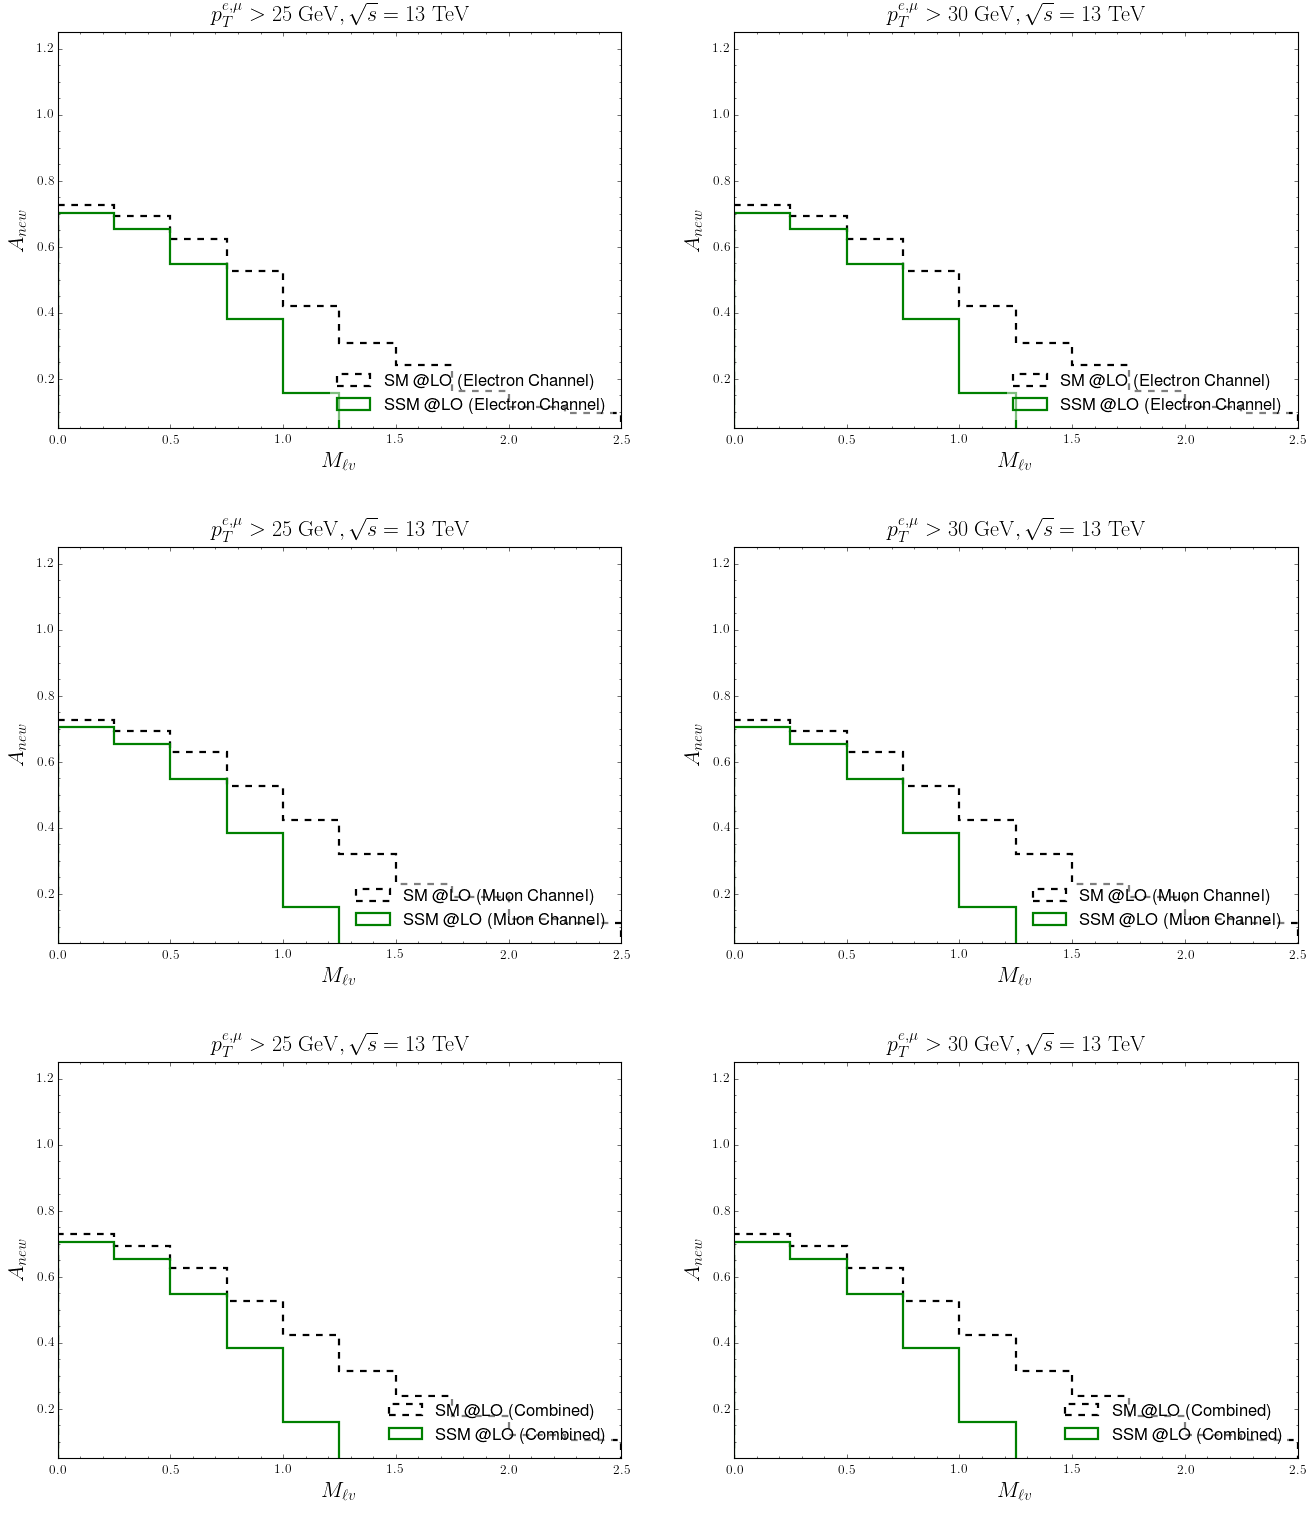

In [138]:
fig = plt.figure(1, figsize=(20, 18), facecolor='w', edgecolor='k')
#bins = np.array(SM_LO_histos[SM_LO_histos.name=='AFB_pos_Rap_No'].binMin).tolist()+[max(SM_LO_histos[SM_LO_histos.name=='AFB_neg_Rap_No'].binMax)]

############ Plotting ##################################

ax1 = plt.subplot(3, 2, 1)
plt.title(r"$\displaystyle p_T^{e,\mu} > 25 {\rm\ GeV}, \sqrt{s}=13 {\rm\ TeV}$", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_plus)'].binlabel,bins=bins,
             label=r'SM @LO (Electron Channel)', histtype="step", rwidth=1.0,
             weights=SM_LO_ACCnum_Elec_PT25/np.where(SM_LO_ACCden_Elec_PT25==0,1e-10,SM_LO_ACCden_Elec_PT25), 
             color=None, edgecolor='black', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SM @NLO', histtype="step", rwidth=1.0,
#             weights=SM_NLO_AFBnum_RapNo/np.where(SM_NLO_AFBden_RapNo==0,1e-10,SM_NLO_AFBden_RapNo), 
#             color=None, edgecolor='darkblue', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_plus)'].binlabel,bins=bins,
             label=r'SSM @LO (Electron Channel)', histtype="step", rwidth=1.0,
             weights=SSM_LO_ACCnum_Elec_PT25/np.where(SSM_LO_ACCden_Elec_PT25==0,1e-10,SSM_LO_ACCden_Elec_PT25), 
             color=None, edgecolor='green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SSM @NLO (Only $Z^\prime$)', histtype="step", rwidth=1.0,
#             weights=SSMOnlyZp_NLO_AFBnum_RapNo/np.where(SSMOnlyZp_NLO_AFBden_RapNo==0,1e-10,SSMOnlyZp_NLO_AFBden_RapNo), 
#             color=None, edgecolor='pink', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SSM @NLO (Interference @LO)', histtype="step", rwidth=1.0,
#             weights=SSM_NLO_AFBnum_RapNo/np.where(SSM_NLO_AFBden_RapNo==0,1e-10,SSM_NLO_AFBden_RapNo), 
#             color=None, edgecolor='lightgreen', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.xlabel('$|\eta_{\ell}|$' , fontsize=20)
plt.xlabel('$M_{\ell v}$' , fontsize=20)
plt.ylabel('$A_{new}$' , fontsize=20)


ax2 = plt.subplot(3, 2, 2)
plt.title(r"$\displaystyle p_T^{e,\mu} > 30 {\rm\ GeV}, \sqrt{s}=13 {\rm\ TeV}$", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Electron_plus)'].binlabel,bins=bins,
             label=r'SM @LO (Electron Channel)', histtype="step", rwidth=1.0,
             weights=SM_LO_ACCnum_Elec_PT30/np.where(SM_LO_ACCden_Elec_PT30==0,1e-10,SM_LO_ACCden_Elec_PT30), 
             color=None, edgecolor='black', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SM @NLO', histtype="step", rwidth=1.0,
#             weights=SM_NLO_AFBnum_RapNo/np.where(SM_NLO_AFBden_RapNo==0,1e-10,SM_NLO_AFBden_RapNo), 
#             color=None, edgecolor='darkblue', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 30 GeV for AbsEta(Electron_plus)'].binlabel,bins=bins,
             label=r'SSM @LO (Electron Channel)', histtype="step", rwidth=1.0,
             weights=SSM_LO_ACCnum_Elec_PT30/np.where(SSM_LO_ACCden_Elec_PT30==0,1e-10,SSM_LO_ACCden_Elec_PT30), 
             color=None, edgecolor='green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="step", rwidth=1.0,
#             weights=SSM_LO_AFBnum_RapNo/np.where(SSM_LO_AFBden_RapNo==0,1e-10,SSM_LO_AFBden_RapNo), 
#             color=None, edgecolor='green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SSM @NLO (Only $Z^\prime$)', histtype="step", rwidth=1.0,
#             weights=SSMOnlyZp_NLO_AFBnum_RapNo/np.where(SSMOnlyZp_NLO_AFBden_RapNo==0,1e-10,SSMOnlyZp_NLO_AFBden_RapNo), 
#             color=None, edgecolor='pink', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SSM @NLO (Interference @LO)', histtype="step", rwidth=1.0,
#             weights=SSM_NLO_AFBnum_RapNo/np.where(SSM_NLO_AFBden_RapNo==0,1e-10,SSM_NLO_AFBden_RapNo), 
#             color=None, edgecolor='lightgreen', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.xlabel('$|\eta_{\ell}|$' , fontsize=20)
plt.xlabel('$M_{\ell v}$' , fontsize=20)
plt.ylabel('$A_{new}$' , fontsize=20)


ax3 = plt.subplot(3, 2, 3)
plt.title(r"$\displaystyle p_T^{e,\mu} > 25 {\rm\ GeV}, \sqrt{s}=13 {\rm\ TeV}$", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Muon_plus)'].binlabel,bins=bins,
             label=r'SM @LO (Muon Channel)', histtype="step", rwidth=1.0,
             weights=SM_LO_ACCnum_Muon_PT25/np.where(SM_LO_ACCden_Muon_PT25==0,1e-10,SM_LO_ACCden_Muon_PT25), 
             color=None, edgecolor='black', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SM @NLO', histtype="step", rwidth=1.0,
#             weights=SM_NLO_AFBnum_RapNo/np.where(SM_NLO_AFBden_RapNo==0,1e-10,SM_NLO_AFBden_RapNo), 
#             color=None, edgecolor='darkblue', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Muon_plus)'].binlabel,bins=bins,
             label=r'SSM @LO (Muon Channel)', histtype="step", rwidth=1.0,
             weights=SSM_LO_ACCnum_Muon_PT25/np.where(SSM_LO_ACCden_Muon_PT25==0,1e-10,SSM_LO_ACCden_Muon_PT25), 
             color=None, edgecolor='green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SSM @NLO (Only $Z^\prime$)', histtype="step", rwidth=1.0,
#             weights=SSMOnlyZp_NLO_AFBnum_RapNo/np.where(SSMOnlyZp_NLO_AFBden_RapNo==0,1e-10,SSMOnlyZp_NLO_AFBden_RapNo), 
#             color=None, edgecolor='pink', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SSM @NLO (Interference @LO)', histtype="step", rwidth=1.0,
#             weights=SSM_NLO_AFBnum_RapNo/np.where(SSM_NLO_AFBden_RapNo==0,1e-10,SSM_NLO_AFBden_RapNo), 
#             color=None, edgecolor='lightgreen', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.xlabel('$|\eta_{\ell}|$' , fontsize=20)
plt.xlabel('$M_{\ell v}$' , fontsize=20)
plt.ylabel('$A_{new}$' , fontsize=20)


ax4 = plt.subplot(3, 2, 4)
plt.title(r"$\displaystyle p_T^{e,\mu} > 30 {\rm\ GeV}, \sqrt{s}=13 {\rm\ TeV}$", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Muon_plus)'].binlabel,bins=bins,
             label=r'SM @LO (Muon Channel)', histtype="step", rwidth=1.0,
             weights=SM_LO_ACCnum_Muon_PT30/np.where(SM_LO_ACCden_Muon_PT30==0,1e-10,SM_LO_ACCden_Muon_PT30), 
             color=None, edgecolor='black', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SM @NLO', histtype="step", rwidth=1.0,
#             weights=SM_NLO_AFBnum_RapNo/np.where(SM_NLO_AFBden_RapNo==0,1e-10,SM_NLO_AFBden_RapNo), 
#             color=None, edgecolor='darkblue', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 30 GeV for AbsEta(Muon_plus)'].binlabel,bins=bins,
             label=r'SSM @LO (Muon Channel)', histtype="step", rwidth=1.0,
             weights=SSM_LO_ACCnum_Muon_PT30/np.where(SSM_LO_ACCden_Muon_PT30==0,1e-10,SSM_LO_ACCden_Muon_PT30), 
             color=None, edgecolor='green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="step", rwidth=1.0,
#             weights=SSM_LO_AFBnum_RapNo/np.where(SSM_LO_AFBden_RapNo==0,1e-10,SSM_LO_AFBden_RapNo), 
#             color=None, edgecolor='green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SSM @NLO (Only $Z^\prime$)', histtype="step", rwidth=1.0,
#             weights=SSMOnlyZp_NLO_AFBnum_RapNo/np.where(SSMOnlyZp_NLO_AFBden_RapNo==0,1e-10,SSMOnlyZp_NLO_AFBden_RapNo), 
#             color=None, edgecolor='pink', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SSM @NLO (Interference @LO)', histtype="step", rwidth=1.0,
#             weights=SSM_NLO_AFBnum_RapNo/np.where(SSM_NLO_AFBden_RapNo==0,1e-10,SSM_NLO_AFBden_RapNo), 
#             color=None, edgecolor='lightgreen', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.xlabel('$|\eta_{\ell}|$' , fontsize=20)
plt.xlabel('$M_{\ell v}$' , fontsize=20)
plt.ylabel('$A_{new}$' , fontsize=20)


ax5 = plt.subplot(3, 2, 5)
plt.title(r"$\displaystyle p_T^{e,\mu} > 25 {\rm\ GeV}, \sqrt{s}=13 {\rm\ TeV}$", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
             label=r'SM @LO (Combined)', histtype="step", rwidth=1.0,
             weights=SM_LO_ACCnum_Lep_PT25/np.where(SM_LO_ACCden_Lep_PT25==0,1e-10,SM_LO_ACCden_Lep_PT25), 
             color=None, edgecolor='black', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SM @NLO', histtype="step", rwidth=1.0,
#             weights=SM_NLO_AFBnum_RapNo/np.where(SM_NLO_AFBden_RapNo==0,1e-10,SM_NLO_AFBden_RapNo), 
#             color=None, edgecolor='darkblue', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
             label=r'SSM @LO (Combined)', histtype="step", rwidth=1.0,
             weights=SSM_LO_ACCnum_Lep_PT25/np.where(SSM_LO_ACCden_Lep_PT25==0,1e-10,SSM_LO_ACCden_Lep_PT25), 
             color=None, edgecolor='green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SSM @NLO (Only $Z^\prime$)', histtype="step", rwidth=1.0,
#             weights=SSMOnlyZp_NLO_AFBnum_RapNo/np.where(SSMOnlyZp_NLO_AFBden_RapNo==0,1e-10,SSMOnlyZp_NLO_AFBden_RapNo), 
#             color=None, edgecolor='pink', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SSM @NLO (Interference @LO)', histtype="step", rwidth=1.0,
#             weights=SSM_NLO_AFBnum_RapNo/np.where(SSM_NLO_AFBden_RapNo==0,1e-10,SSM_NLO_AFBden_RapNo), 
#             color=None, edgecolor='lightgreen', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.xlabel('$|\eta_{\ell}|$' , fontsize=20)
plt.xlabel('$M_{\ell v}$' , fontsize=20)
plt.ylabel('$A_{new}$' , fontsize=20)


ax6 = plt.subplot(3, 2, 6)
plt.title(r"$\displaystyle p_T^{e,\mu} > 30 {\rm\ GeV}, \sqrt{s}=13 {\rm\ TeV}$", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
             label=r'SM @LO (Combined)', histtype="step", rwidth=1.0,
             weights=SM_LO_ACCnum_Lep_PT30/np.where(SM_LO_ACCden_Lep_PT30==0,1e-10,SM_LO_ACCden_Lep_PT30), 
             color=None, edgecolor='black', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SM @NLO', histtype="step", rwidth=1.0,
#             weights=SM_NLO_AFBnum_RapNo/np.where(SM_NLO_AFBden_RapNo==0,1e-10,SM_NLO_AFBden_RapNo), 
#             color=None, edgecolor='darkblue', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
             label=r'SSM @LO (Combined)', histtype="step", rwidth=1.0,
             weights=SSM_LO_ACCnum_Lep_PT30/np.where(SSM_LO_ACCden_Lep_PT30==0,1e-10,SSM_LO_ACCden_Lep_PT30), 
             color=None, edgecolor='green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="step", rwidth=1.0,
#             weights=SSM_LO_AFBnum_RapNo/np.where(SSM_LO_AFBden_RapNo==0,1e-10,SSM_LO_AFBden_RapNo), 
#             color=None, edgecolor='green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SSM @NLO (Only $Z^\prime$)', histtype="step", rwidth=1.0,
#             weights=SSMOnlyZp_NLO_AFBnum_RapNo/np.where(SSMOnlyZp_NLO_AFBden_RapNo==0,1e-10,SSMOnlyZp_NLO_AFBden_RapNo), 
#             color=None, edgecolor='pink', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(SSM_NLO_histos[SSM_NLO_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
#             label=r'SSM @NLO (Interference @LO)', histtype="step", rwidth=1.0,
#             weights=SSM_NLO_AFBnum_RapNo/np.where(SSM_NLO_AFBden_RapNo==0,1e-10,SSM_NLO_AFBden_RapNo), 
#             color=None, edgecolor='lightgreen', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.xlabel('$|\eta_{\ell}|$' , fontsize=20)
plt.xlabel('$M_{\ell v}$' , fontsize=20)
plt.ylabel('$A_{new}$' , fontsize=20)


leg = ax1.legend(loc='lower right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax1.set_xlim([min(bins),max(bins)])
ax1.set_ylim([0.05,1.25])

leg = ax2.legend(loc='lower right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax2.set_xlim([min(bins),max(bins)])
ax2.set_ylim([0.05,1.25])


leg = ax3.legend(loc='lower right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax3.set_xlim([min(bins),max(bins)])
ax3.set_ylim([0.05,1.25])

leg = ax4.legend(loc='lower right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax4.set_xlim([min(bins),max(bins)])
ax4.set_ylim([0.05,1.25])

leg = ax5.legend(loc='lower right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax5.set_xlim([min(bins),max(bins)])
ax5.set_ylim([0.05,1.25])

leg = ax6.legend(loc='lower right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax6.set_xlim([min(bins),max(bins)])
ax6.set_ylim([0.05,1.25])

plt.subplots_adjust(top = 1.0, bottom=0.01, hspace=0.3, wspace=0.2)
plt.show()